In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/delaney-solubility-with-descriptors/delaney_solubility_with_descriptors.csv


In [2]:
data = pd.read_csv('/kaggle/input/delaney-solubility-with-descriptors/delaney_solubility_with_descriptors.csv')
data2 = data.copy()
data.head(5)


,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.5954,167.850,0.0,0.0,-2.18
1,2.3765,133.405,0.0,0.0,-2.00
2,2.5938,167.850,1.0,0.0,-1.74
3,2.0289,133.405,1.0,0.0,-1.48
4,2.9189,187.375,1.0,0.0,-3.04


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MolLogP             1144 non-null   float64
 1   MolWt               1144 non-null   float64
 2   NumRotatableBonds   1144 non-null   float64
 3   AromaticProportion  1144 non-null   float64
 4   logS                1144 non-null   float64
dtypes: float64(5)
memory usage: 44.8 KB


In [4]:
from pandas_profiling import ProfileReport 
profile = ProfileReport(data)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
data.isna().sum()

MolLogP               0
MolWt                 0
NumRotatableBonds     0
AromaticProportion    0
logS                  0
dtype: int64

In [6]:
X = data.drop('logS',axis=1)
y = data['logS']

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score

In [9]:
pip install git+https://github.com/pycaret/pycaret.git

  Cloning https://github.com/pycaret/pycaret.git to /tmp/pip-req-build-vghx6mze
  Running command git clone --filter=blob:none --quiet https://github.com/pycaret/pycaret.git /tmp/pip-req-build-vghx6mze
  Resolved https://github.com/pycaret/pycaret.git to commit ca4459ae18626037f7dcd8052b2c5a2796aab585
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.7/147.7 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 4.3 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - \ | / - \ | / - done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━

In [10]:
from pycaret.regression import setup, compare_models, predict_model
pycaret_automl = setup(data=data, target = 'logS', session_id=667)

,Description,Value
0,Session id,667
1,Target,logS
2,Target type,Regression
3,Original data shape,"(1144, 5)"
4,Transformed data shape,"(1144, 5)"
5,Transformed train set shape,"(800, 5)"
6,Transformed test set shape,"(344, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [11]:
pycaret_models = compare_models(sort='RMSE', budget_time=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.5305,0.5570,0.7437,0.8658,0.2132,0.7229,0.2210
rf,Random Forest Regressor,0.5407,0.5749,0.7540,0.8614,0.2140,0.7739,0.2490
catboost,CatBoost Regressor,0.5580,0.5857,0.7614,0.8591,0.2168,0.7258,1.1060
lightgbm,Light Gradient Boosting Machine,0.5705,0.6224,0.7862,0.8502,0.2223,0.8127,0.2190
xgboost,Extreme Gradient Boosting,0.5698,0.6354,0.7919,0.8471,0.2243,0.7910,0.2330
gbr,Gradient Boosting Regressor,0.5993,0.6388,0.7962,0.8459,0.2287,0.7950,0.1410
ada,AdaBoost Regressor,0.7068,0.8401,0.9141,0.7944,0.2468,0.9580,0.0800
dt,Decision Tree Regressor,0.6632,0.9100,0.9480,0.7801,0.2532,0.9822,0.0280
lar,Least Angle Regression,0.7781,1.0212,1.0063,0.7533,0.2854,0.9803,0.0300
ridge,Ridge Regression,0.7782,1.0212,1.0063,0.7533,0.2854,0.9804,0.0290


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [12]:
print(pycaret_models)

ExtraTreesRegressor(n_jobs=-1, random_state=667)


In [13]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor(n_jobs=-1, random_state=667)
model.fit(X_train,y_train)

ExtraTreesRegressor(n_jobs=-1, random_state=667)

In [14]:
model.score(X_test,y_test)

0.8904892680979197

In [15]:
data3 = data2[['MolWt','logS']]

y_pred = model.predict(X)
data3['Prediction'] = np.round(y_pred)
data3.head(3)

,MolWt,logS,Prediction
0,167.850,-2.18,-2.0
1,133.405,-2.00,-2.0
2,167.850,-1.74,-2.0


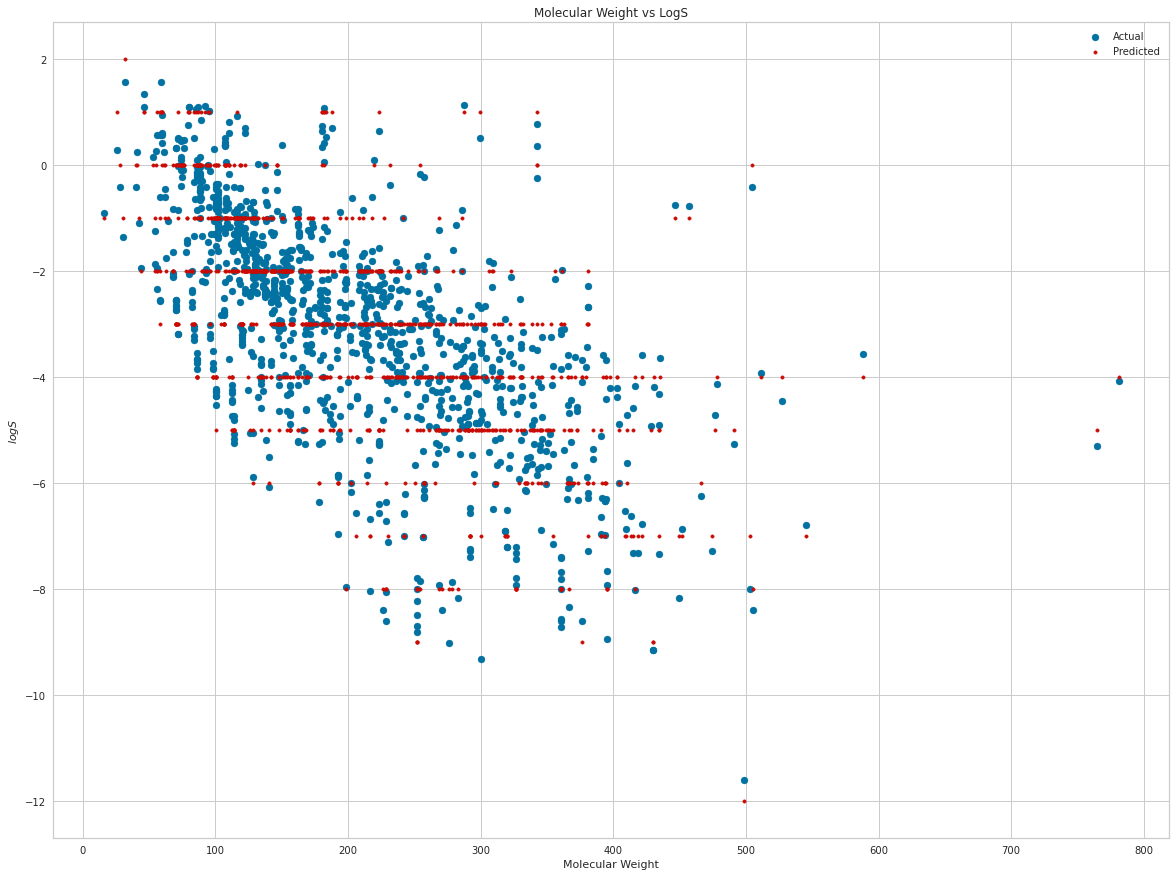

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
plt.scatter(data3['MolWt'],data3['logS'],label='Actual')
plt.scatter(data3['MolWt'],data3['Prediction'],label='Predicted',color='r',marker='.')
plt.title("Molecular Weight vs LogS")
plt.xlabel("Molecular Weight")
plt.ylabel("$logS$")
plt.legend()
plt.show()